In [1]:
import pyodbc
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=MARCO-DESKTOP;Database=AnalyticsBU;Trusted_Connection=yes;')
cursor = cnxn.cursor()
cursor.execute("SELECT * FROM Sales.OrdersByCity")
while 1:
    row = cursor.fetchone()
    if not row:
        break
    print(row)
cnxn.close()

(38171, 'Zionsville', '2016-01-02', 'A Datum Corporation', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-04', 'Graphic Design Institute', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-19', 'Graphic Design Institute', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-14', 'Graphic Design Institute', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-01', 'Graphic Design Institute', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-03', 'Graphic Design Institute', 'Novelty Goods Supplier')
(18634, 'Lanagan', '2013-01-10', 'Graphic Design Institute', 'Novelty Goods Supplier')
(17346, 'Karlstad', '2013-01-05', 'The Phone Company', 'Novelty Goods Supplier')
(17346, 'Karlstad', '2013-01-07', 'The Phone Company', 'Novelty Goods Supplier')
(17346, 'Karlstad', '2013-01-02', 'The Phone Company', 'Novelty Goods Supplier')
(17346, 'Karlstad', '2013-01-03', 'The Phone Company', 'Novelty Goods Supplier')
(17346, 'Karlstad', '2013-01-01', 'The Phone Company', 'Novelty Goods

In [2]:
import pyodbc
import pandas as pd

# Establish a connection to the SQL Server database
cnxn = pyodbc.connect(
    r'Driver=SQL Server;Server=MARCO-DESKTOP;Database=AnalyticsBU;Trusted_Connection=yes;')

# Define queries for each table
queries = {
    'OrdersByCity': "SELECT * FROM Sales.OrdersByCity",
    'OrdersByCustomer': "SELECT * FROM Sales.OrdersByCustomer",
    'OrdersByDelivery': "SELECT * FROM Sales.OrdersByDelivery"
}

# Create a dictionary to hold DataFrames
dfs = {}

# Execute each query and retrieve the data
for table, query in queries.items():
    dfs[table] = pd.read_sql(query, cnxn)

# Print each DataFrame
for table, df in dfs.items():
    print(f"DataFrame for {table}:")
    print(df)
    print()

# Close the database connection
cnxn.close()

DataFrame for OrdersByCity:
      CityID        CityName   OrderDate              SupplierName  \
0      38171      Zionsville  2016-01-02       A Datum Corporation   
1      18634         Lanagan  2013-01-04  Graphic Design Institute   
2      18634         Lanagan  2013-01-19  Graphic Design Institute   
3      18634         Lanagan  2013-01-14  Graphic Design Institute   
4      18634         Lanagan  2013-01-01  Graphic Design Institute   
...      ...             ...         ...                       ...   
4143   22602  Mokelumne Hill  2015-01-13             Litware, Inc.   
4144   22602  Mokelumne Hill  2013-09-12             Litware, Inc.   
4145   22602  Mokelumne Hill  2015-01-16             Litware, Inc.   
4146   22602  Mokelumne Hill  2015-01-12             Litware, Inc.   
4147   22602  Mokelumne Hill  2014-02-04             Litware, Inc.   

            SupplierCategory  
0     Novelty Goods Supplier  
1     Novelty Goods Supplier  
2     Novelty Goods Supplier  
3     N

C:\Users\marco\AppData\Local\Temp\ipykernel_21136\1902146184.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table] = pd.read_sql(query, cnxn)


In [3]:
dfs["OrdersByCustomer"]

,CustomerID,CustomerName,OrderDate,SupplierName,SupplierCategory
0,2,Kayla Woodcock,2016-03-31,"Fabrikam, Inc.",Clothing Supplier
1,2,Kayla Woodcock,2013-06-20,"Litware, Inc.",Packaging Supplier
2,2,Kayla Woodcock,2015-05-30,"Fabrikam, Inc.",Clothing Supplier
3,3,Hudson Onslow,2015-12-12,"Fabrikam, Inc.",Clothing Supplier
4,3,Hudson Onslow,2014-08-06,"Fabrikam, Inc.",Clothing Supplier
...,...,...,...,...,...
1045,45,Hubert Helms,2014-10-16,"Fabrikam, Inc.",Clothing Supplier
1046,46,Donald Small,2013-05-29,"Litware, Inc.",Packaging Supplier
1047,46,Donald Small,2014-09-02,"Fabrikam, Inc.",Clothing Supplier
1048,46,Donald Small,2014-12-25,"Litware, Inc.",Packaging Supplier


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def plot_accuracy_vs_trees(model, X_train, X_test, y_train, y_test, num_trees):
    accuracies = []

    # Iterate over number of trees
    for n in num_trees:
        # Model Selection and Training
        model.n_estimators = n  # Set number of trees
        model.fit(X_train, y_train)

        # Model Evaluation
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Plot the accuracy versus number of trees
    plt.plot(num_trees, accuracies, marker='o')
    plt.title('Accuracy vs. Number of Trees')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


num_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature Engineering
dfs["OrdersByCustomer"]['OrderDate'] = pd.to_datetime(
    dfs["OrdersByCustomer"]['OrderDate'])

dfs["OrdersByCustomer"]['OrderMonth'] = dfs["OrdersByCustomer"]['OrderDate'].dt.month
dfs["OrdersByCustomer"]['OrderDayOfWeek'] = dfs["OrdersByCustomer"]['OrderDate'].dt.dayofweek

X = dfs["OrdersByCustomer"][['CustomerID', 'OrderMonth', 'OrderDayOfWeek']]
y = dfs["OrdersByCustomer"]['SupplierName']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9952380952380953


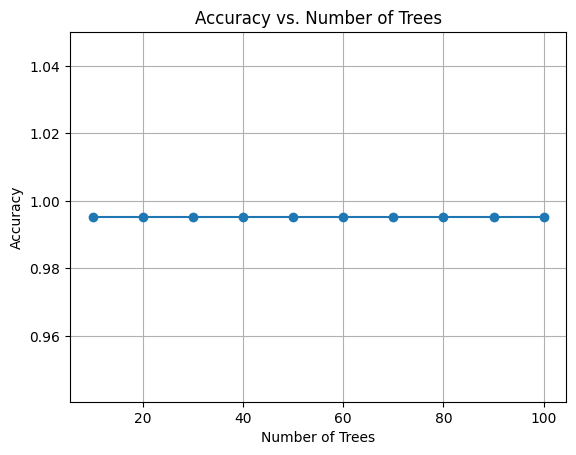

In [6]:
plot_accuracy_vs_trees(model, X_train, X_test, y_train, y_test, num_trees)

In [7]:
dfs["OrdersByCity"]['OrderDate'] = pd.to_datetime(
    dfs["OrdersByCity"]['OrderDate'])

dfs["OrdersByCity"]['OrderMonth'] = dfs["OrdersByCity"]['OrderDate'].dt.month
dfs["OrdersByCity"]['OrderDayOfWeek'] = dfs["OrdersByCity"]['OrderDate'].dt.dayofweek

X = dfs["OrdersByCity"][['CityID', 'OrderMonth', 'OrderDayOfWeek']]
y = dfs["OrdersByCity"]['SupplierName']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


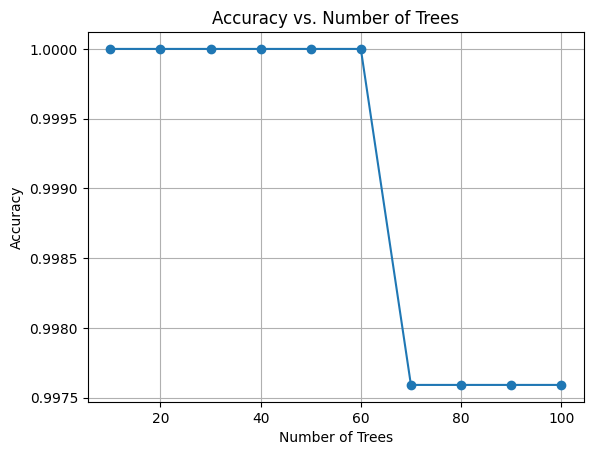

In [8]:
plot_accuracy_vs_trees(model, X_train, X_test, y_train, y_test, num_trees)

In [9]:
dfs["OrdersByDelivery"]['OrderDate'] = pd.to_datetime(
    dfs["OrdersByDelivery"]['OrderDate'])

dfs["OrdersByDelivery"]['OrderMonth'] = dfs["OrdersByDelivery"]['OrderDate'].dt.month
dfs["OrdersByDelivery"]['OrderDayOfWeek'] = dfs["OrdersByDelivery"]['OrderDate'].dt.dayofweek

X = dfs["OrdersByDelivery"][['DeliveryMethodID', 'OrderMonth', 'OrderDayOfWeek']]
y = dfs["OrdersByDelivery"]['SupplierName']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9948779752937632


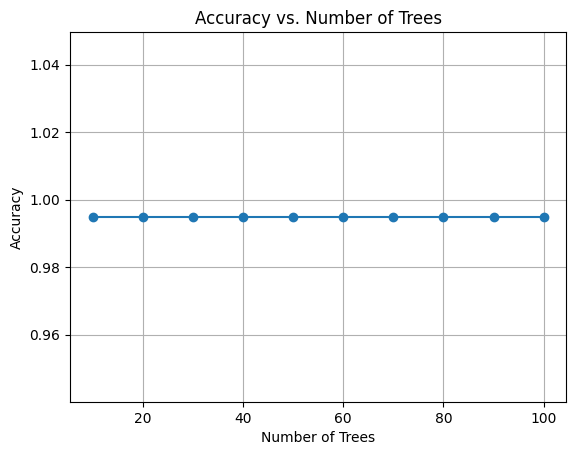

In [10]:
plot_accuracy_vs_trees(model, X_train, X_test, y_train, y_test, num_trees)